In [ ]:
# -*- coding: utf-8 -*-

#Regresion lineal

In [26]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\user\Documents\PYTHON\Python data science y big data\Datos\Indicators_of_Health_Insurance_Coverage.csv",nrows=1e5)


In [27]:
df = df.dropna(subset=['Value'])
df = df.sample(frac=1).head(100000)
Y = df['Value']
X = df['High CI']
X = X.values.reshape(-1,1)
Y = Y.values.reshape(-1,1)

In [18]:
df.columns

Index(['Indicator', 'Group', 'State', 'Subgroup', 'Phase', 'Time Period',
       'Time Period Label', 'Time Period Start Date', 'Time Period End Date',
       'Value', 'Low CI', 'High CI', 'Confidence Interval', 'Quartile Range',
       'Suppression Flag'],
      dtype='object')

In [20]:
regr = linear_model.LinearRegression()
regr.fit(X,Y)

print('coeficientes: ',regr.coef_)
Y_pred = regr.predict(X)
print('R Cuadrado: ',r2_score(Y,Y_pred))

#Regresion lineal

coeficientes:  [[0.99250151]]
R Cuadrado:  0.9958722435758574


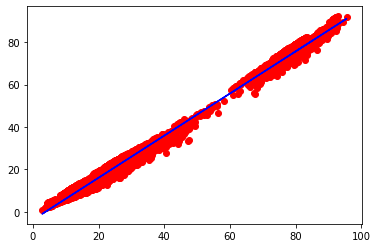

In [22]:
plt.scatter(X[1:10000],Y[1:10000],color='Red')
plt.plot(X[1:10000],Y_pred[1:10000],color='Blue')
plt.show()
#Vemos que efectivamente estan muy correlacionados

In [41]:
x = df[['Value','High CI','Low CI','Time Period']]

#si queremos que las variables regresoras sean categoricas y aun no lo son hacemos
#df['Month'] = df['Month'].apply(str)

dummies = pd.get_dummies(data=df[['Group','Subgroup','State']])
x = dummies.add(x,fill_value=0)



In [42]:
y = df['Value']
y = y.values.reshape(-1,1)

x.columns

Index(['Group_By Age', 'Group_By Disability status', 'Group_By Education',
       'Group_By Gender identity', 'Group_By Race/Hispanic ethnicity',
       'Group_By Sex', 'Group_By Sexual orientation', 'Group_By State',
       'Group_National Estimate', 'High CI',
       ...
       'Subgroup_Vermont', 'Subgroup_Virginia', 'Subgroup_Washington',
       'Subgroup_West Virginia', 'Subgroup_Wisconsin',
       'Subgroup_With disability', 'Subgroup_Without disability',
       'Subgroup_Wyoming', 'Time Period', 'Value'],
      dtype='object', length=140)

In [43]:
regr = linear_model.LinearRegression()
regr.fit(x,y)

#print('Coeficientes: ',regr.coef_)
y_pred = regr.predict(x)
print('R cuadrado: ',r2_score(y,y_pred))
#este resultado significa que las variables en X (group y subgroup) explicann a la perfeccion la variable Value

R cuadrado:  1.0


In [37]:
#Si no explicara tan bien la variable podriamos intentar agregar otra variable explicativa asi 

x = x.add(df[['High CI']],fill_value=0)